<a href="https://colab.research.google.com/github/AustinPariseau/IS4487-Spring-Real/blob/main/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from html import unescape

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv ('/content/drive/MyDrive/IS 4487 Colab/x_superbowl.csv')

df.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,contributors,quote_count,reply_count,retweet_count,favorite_count,quoted_status_id,quoted_status_id_str
count,9756.000000,9.756000e+03,9.756000e+03,2.863000e+03,2.863000e+03,2.985000e+03,2.985000e+03,0.0,9756.000000,9756.000000,9756.000000,9756.000000,2.400000e+02,2.400000e+02
mean,4749.132226,1.358590e+18,1.358590e+18,1.357976e+18,1.357976e+18,7.661037e+17,7.661036e+17,NaN,0.024395,0.289565,0.187577,1.862854,1.351627e+18,1.351627e+18
std,2813.702919,2.346799e+13,2.281055e+13,1.813591e+16,1.813591e+16,5.781080e+17,5.781079e+17,NaN,0.248871,1.934631,3.435467,31.547737,5.209077e+16,5.209088e+16
min,0.000000,1.358560e+18,1.358559e+18,4.475270e+17,4.475267e+17,2.682300e+04,2.682300e+04,NaN,0.000000,0.000000,0.000000,0.000000,8.165590e+17,8.165588e+17
25%,2308.750000,1.358570e+18,1.358567e+18,1.358560e+18,1.358558e+18,1.399829e+09,1.399829e+09,NaN,0.000000,0.000000,0.000000,0.000000,1.358278e+18,1.358279e+18
50%,4747.500000,1.358590e+18,1.358587e+18,1.358580e+18,1.358576e+18,1.041530e+18,1.041529e+18,NaN,0.000000,0.000000,0.000000,0.000000,1.358545e+18,1.358544e+18
75%,7186.250000,1.358610e+18,1.358610e+18,1.358600e+18,1.358600e+18,1.284830e+18,1.284832e+18,NaN,0.000000,0.000000,0.000000,1.000000,1.358580e+18,1.358579e+18
max,9625.000000,1.358630e+18,1.358634e+18,1.358630e+18,1.358634e+18,1.358610e+18,1.358606e+18,NaN,12.000000,87.000000,264.000000,2830.000000,1.358630e+18,1.358633e+18


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as user_mentioned, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [3]:
str_numeric_columns = ['in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str']

unnamed_columns = [col for col in df.columns if 'Unnamed' in col]
df_cleaned = df.drop(columns=unnamed_columns)

df_cleaned['created_at'] = pd.to_datetime(df_cleaned['created_at'], errors='coerce')

numeric_columns = ['quote_count', 'reply_count', 'retweet_count', 'favorite_count']
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

complex_data_columns = ['user', 'entities', 'retweeted_status', 'extended_tweet',
                        'extended_entities', 'quoted_status', 'quoted_status_permalink', 'scopes']
df_cleaned = df_cleaned.drop(columns=complex_data_columns, errors='ignore')

df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(0)

df_cleaned[str_numeric_columns] = df_cleaned[str_numeric_columns].apply(pd.to_numeric, errors='coerce')

df_no_duplicates = df_cleaned.drop_duplicates(subset='id_str')

print(f"The total amount of tweets is {df_no_duplicates.shape[0]}")

df_no_duplicates.describe()

The total amount of tweets is 9748


,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,contributors,quote_count,reply_count,retweet_count,favorite_count,quoted_status_id,quoted_status_id_str
count,9.748000e+03,9.748000e+03,2.862000e+03,2.862000e+03,2.984000e+03,2.984000e+03,0.0,9748.000000,9748.000000,9748.000000,9748.000000,2.400000e+02,2.400000e+02
mean,1.358590e+18,1.358590e+18,1.357975e+18,1.357976e+18,7.663604e+17,7.663604e+17,NaN,0.024415,0.289700,0.187628,1.863870,1.351627e+18,1.351627e+18
std,2.346822e+13,2.281025e+13,1.813908e+16,1.813908e+16,5.780346e+17,5.780346e+17,NaN,0.248972,1.935396,3.436863,31.560648,5.209077e+16,5.209088e+16
min,1.358560e+18,1.358559e+18,4.475270e+17,4.475267e+17,2.682300e+04,2.682300e+04,NaN,0.000000,0.000000,0.000000,0.000000,8.165590e+17,8.165588e+17
25%,1.358570e+18,1.358567e+18,1.358560e+18,1.358558e+18,1.400457e+09,1.400457e+09,NaN,0.000000,0.000000,0.000000,0.000000,1.358278e+18,1.358279e+18
50%,1.358590e+18,1.358587e+18,1.358580e+18,1.358576e+18,1.041735e+18,1.041734e+18,NaN,0.000000,0.000000,0.000000,0.000000,1.358545e+18,1.358544e+18
75%,1.358610e+18,1.358610e+18,1.358600e+18,1.358600e+18,1.284912e+18,1.284915e+18,NaN,0.000000,0.000000,0.000000,1.000000,1.358580e+18,1.358579e+18
max,1.358630e+18,1.358634e+18,1.358630e+18,1.358634e+18,1.358610e+18,1.358606e+18,NaN,12.000000,87.000000,264.000000,2830.000000,1.358630e+18,1.358633e+18


## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 posts with highest engagement

<ipython-input-4-bc79d256d77e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_counts.values, y=device_counts.index, palette='viridis')


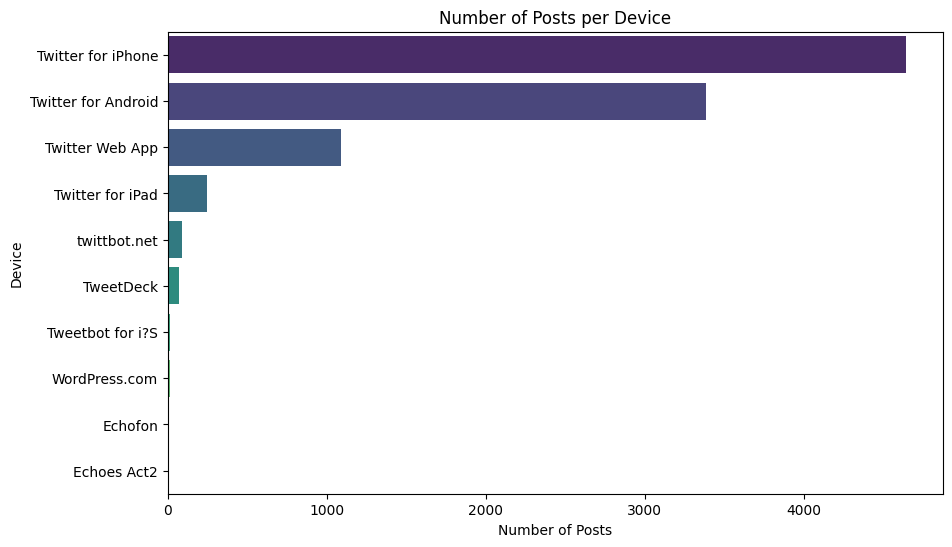

In [4]:
df['source'] = df['source'].astype(str)

df['device'] = df['source'].str.extract('>([^<]+)<')

device_counts = df['device'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=device_counts.values, y=device_counts.index, palette='viridis')
plt.title('Number of Posts per Device')
plt.xlabel('Number of Posts')
plt.ylabel('Device')
plt.show()


<ipython-input-5-41b2a7979a62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['engagement'] = df_reduced['retweet_count'] + df_reduced['favorite_count']
<ipython-input-5-41b2a7979a62>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='engagement', y=top_engagement['text'].apply(lambda x: x[:50] + '...'), data=top_engagement, palette='coolwarm')


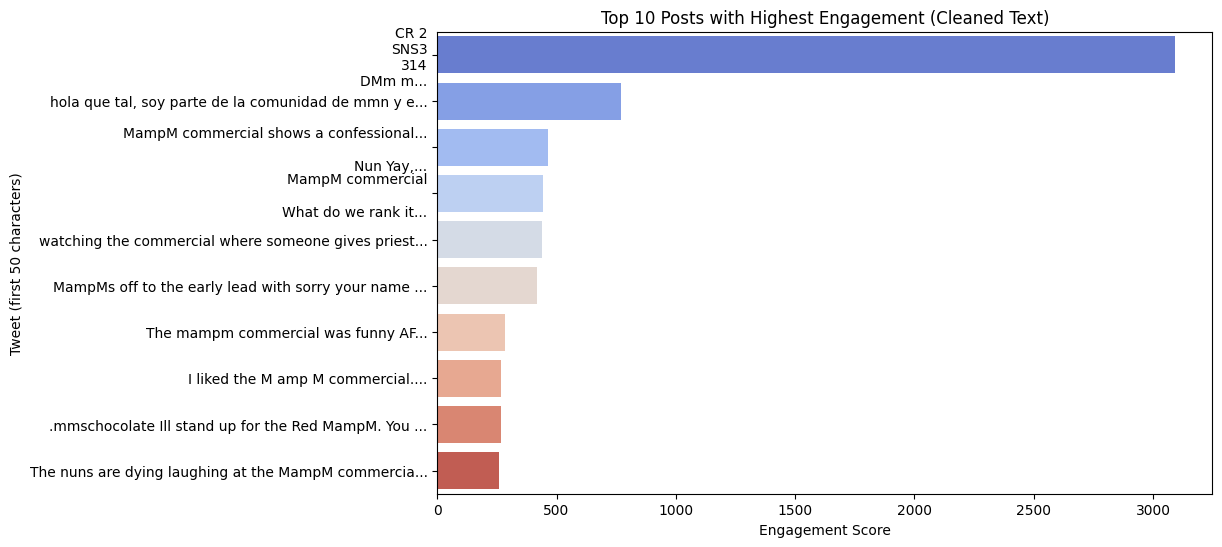

In [5]:
df_reduced = df[['created_at', 'id', 'text', 'retweet_count', 'favorite_count', 'in_reply_to_status_id', 'quote_count', 'reply_count']]
df_reduced['engagement'] = df_reduced['retweet_count'] + df_reduced['favorite_count']
top_engagement = df_reduced.nlargest(10, 'engagement')
def clean_tweet_text_v2(text):
    pattern = r'[@?]|[^a-zA-Z0-9\s,.\'!-]'
    return re.sub(pattern, '', text)

top_engagement['text'] = top_engagement['text'].apply(clean_tweet_text_v2)

plt.figure(figsize=(10, 6))
sns.barplot(x='engagement', y=top_engagement['text'].apply(lambda x: x[:50] + '...'), data=top_engagement, palette='coolwarm')
plt.title('Top 10 Posts with Highest Engagement (Cleaned Text)')
plt.xlabel('Engagement Score')
plt.ylabel('Tweet (first 50 characters)')
plt.show()